# Нелинейные данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

/Users/tural/.virtualenvs/P3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Датасет: http://www-bcf.usc.edu/~gareth/ISL/Auto.csv
auto_df = pd.read_csv("/Users/tural/PyNotes/Netology, feature engineering/data/Auto.csv", na_values='?').dropna()
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Датасет содержит информацию о потреблении топлива различными автомобилями.

Атрибуты, которые мы будем рассматривать:
* mpg - пробег (в милях) на галон бензина
* howsepower - количество лошадиных сил

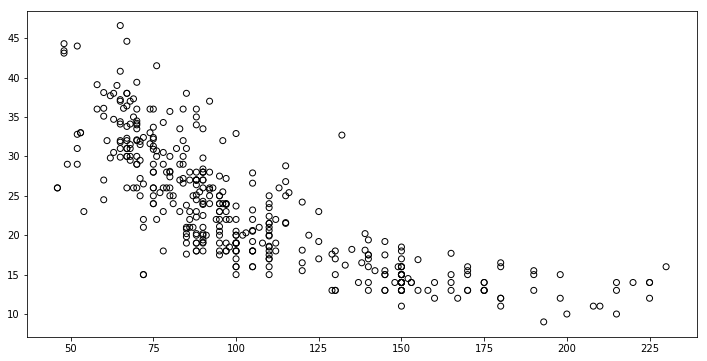

In [3]:
plt.figure(figsize=(12, 6))
plt.scatter(auto_df.horsepower, auto_df.mpg, facecolors='None', edgecolors='k') 

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

auto_df.sort_values("horsepower", inplace=True)

# линейная регрессия
X = auto_df.horsepower.values.reshape(-1, 1)
y = auto_df.mpg.values.reshape(-1, 1)
lm = LinearRegression().fit(X, y)
y_pred = lm.predict(X)

# полином второй степени
X2 = PolynomialFeatures(degree=2).fit_transform(X)
lm2 = LinearRegression().fit(X2, y)
y2_pred = lm2.predict(X2)

# полином пятой степени
X5 = PolynomialFeatures(degree=5).fit_transform(X)
lm5 = LinearRegression().fit(X5, y)
y5_pred = lm5.predict(X5)

/Users/tural/.virtualenvs/P3/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


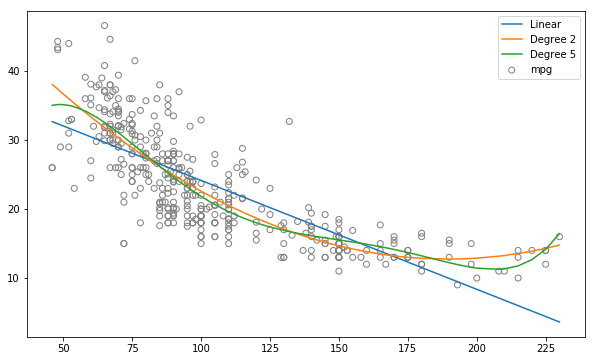

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(auto_df.horsepower, auto_df.mpg, facecolors='None', edgecolors='grey') 
plt.plot(X, y_pred, label='Linear') 
plt.plot(X, y2_pred, label='Degree 2') 
plt.plot(X, y5_pred, label='Degree 5') 
plt.legend(loc=1)

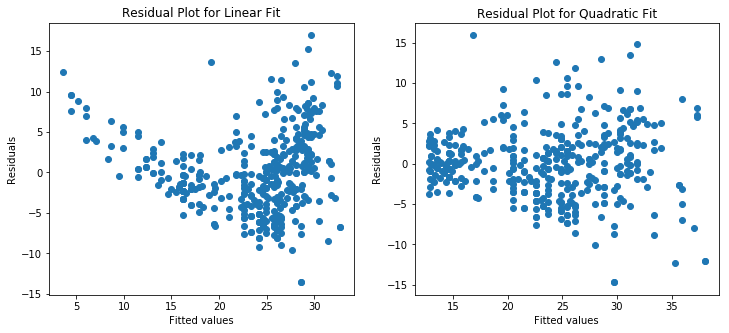

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(y_pred, y - y_pred)
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
ax2.scatter(y2_pred, y - y2_pred)
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

# Коллинеарность

In [7]:
# датасет http://www-bcf.usc.edu/~gareth/ISL/Credit.csv
credit_df = pd.read_csv('/Users/tural/PyNotes/Netology, feature engineering/Data/Credit.csv', usecols=list(range(1,12)))
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Датасет содержит информацию о кредитном балансе разных людей

Атрибуты, которые мы будем рассматривать:
* Age - возраст
* Limit - кредитный лимит
* Rating - кредитный рейтинг 
* Balance - количество лошадиных сил

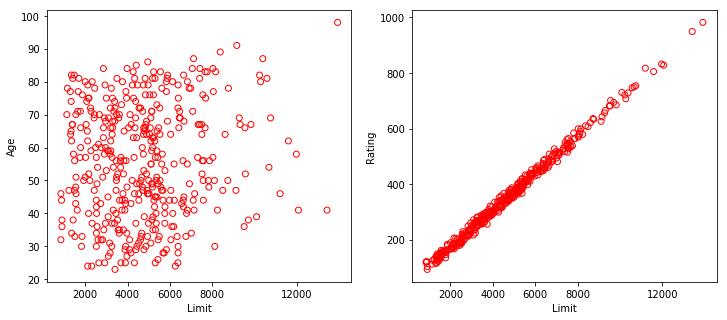

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(credit_df.Limit, credit_df.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Age')

# Right plot
ax2.scatter(credit_df.Limit, credit_df.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Rating')

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000,4000,6000,8000,12000])

In [9]:
est = smf.ols('Balance ~ Age + Limit', credit_df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     595.0
Date:                Sun, 12 Nov 2017   Prob (F-statistic):          3.52e-120
Time:                        20:02:01   Log-Likelihood:                -2742.2
No. Observations:                 400   AIC:                             5490.
Df Residuals:                     397   BIC:                             5502.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -173.4109     43.828     -3.957      0.000    -259.576     -87.246
Age           -2.2915      0.672     -3.407      0.001      -3.614      -0.969
Limit          0.1734      0.005     34.496      0.000       0.163       0.183
==============================================================================
Omnibus:                       19.180   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.162
Skew:                           0.382   Prob(JB):                     1.26e-06
Kurtosis:                       4.022   Cond. No.                     2.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
est = smf.ols('Balance ~ Rating + Limit', credit_df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     582.8
Date:                Sun, 12 Nov 2017   Prob (F-statistic):          7.57e-119
Time:                        20:02:01   Log-Likelihood:                -2745.3
No. Observations:                 400   AIC:                             5497.
Df Residuals:                     397   BIC:                             5509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -377.5368     45.254     -8.343      0.000    -466.505    -288.569
Rating         2.2017      0.952      2.312      0.021       0.330       4.074
Limit          0.0245      0.064      0.384      0.701      -0.101       0.150
==============================================================================
Omnibus:                       23.153   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.187
Skew:                           0.394   Prob(JB):                     5.10e-09
Kurtosis:                       4.293   Cond. No.                     2.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* первый пример говорит, что Limit значим для предсказания Balance
* второй пример говорит, что Limit не значим для предсказания Balance (значимость Limit замаскировона коллинеарностью)